In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

print(df.head())
print('\n')

pd.set_option('display.max_columns', 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

# Step 2

In [26]:
print(df.info())
print('\n')
print(df.describe())
print(df['horsepower'].unique())            # unique = 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)         # ? -> np.nan
df.dropna(subset=['horsepower'], axis=0, inplace=True)      # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')         # 문자열을 실수형으로 변환
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

# Step 3

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


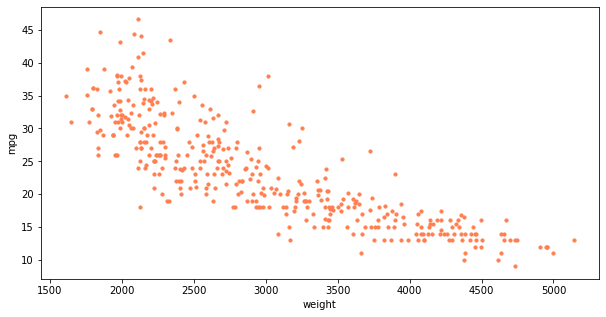

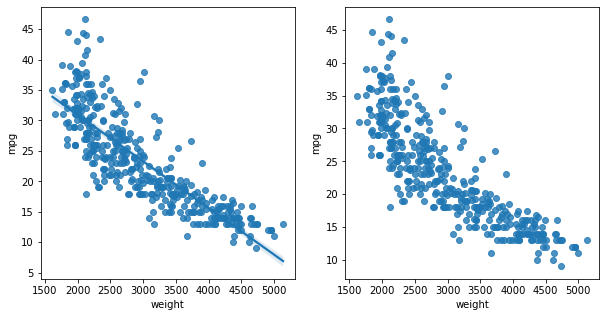

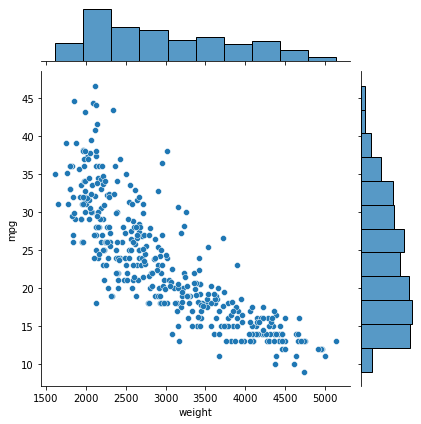

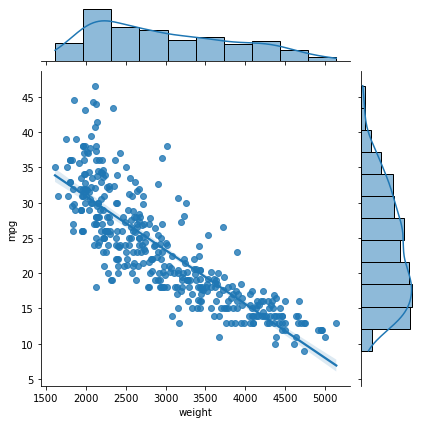

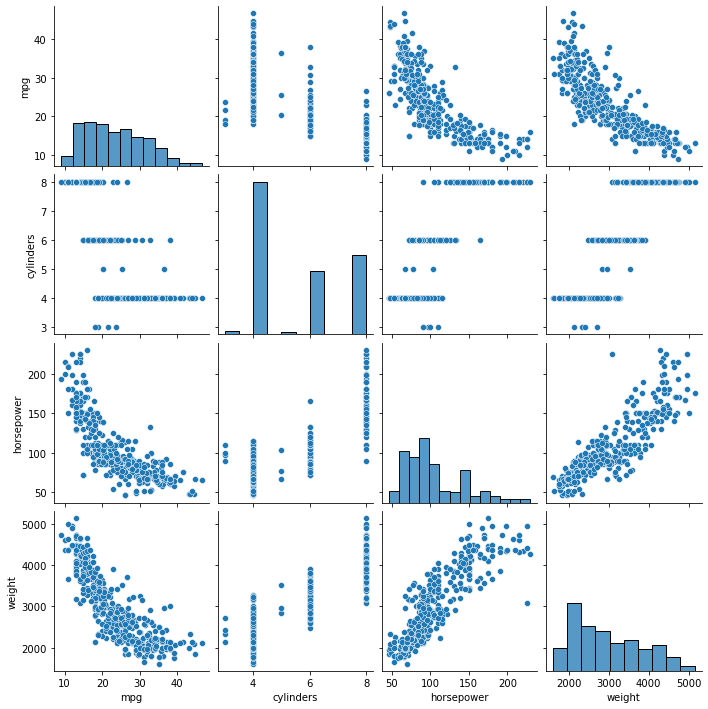

In [27]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                      # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)       # 회귀선 미표시
plt.show()

sns.jointplot(x='weight', y='mpg', data=ndf)                # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)    # 회귀선 표시
plt.show()

grid_ndf = sns.pairplot(ndf)
plt.show()

# Step 4

In [28]:
X = ndf[['weight']]
Y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)   # 독립변수, 종속변수, 검증 30%, 랜덤 추출값
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


# Step 5

기울기 a:  [-0.00775343]
y절편 b 46.710366257280086


c:\Users\knh30\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\knh30\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


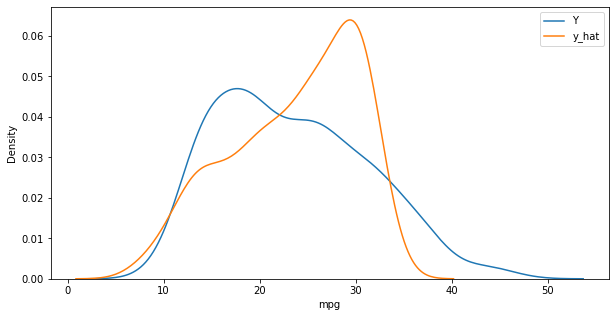

In [29]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression


lr = LinearRegression()         # 단순회귀분석 모형 객체 생성
lr.fit(X_train, Y_train)        # train data를 가지고 모형 학습

print('기울기 a: ', lr.coef_)   # 회귀식의 기울기
print('y절편 b', lr.intercept_) # 회귀식의 y절편

y_hat = lr.predict(X)
plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y, hist=False, label='Y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [30]:
import sklearn.metrics as sm
print(sm.mean_squared_error(Y_test, y_hat))
print(sm.mean_absolute_error(Y_test, y_hat))

ValueError: Found input variables with inconsistent numbers of samples: [118, 392]